In [1]:
import re
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

pd.set_option('display.max_rows', 100)

In [2]:
def flatten(l):
    return [i for s in l for i in s]

def unique(l):
    return list(set(l))


In [3]:
df = pd.read_csv('data.csv')
display(df.info())
display(df.describe(include='all').transpose())

/home/boris/.virtualenvs/jupyter/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (66,67,71,76,78,82) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10679 entries, 0 to 10678
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   oem                         10679 non-null  object
 1   model                       10679 non-null  object
 2   network_technology          10679 non-null  object
 3   network_2g_bands            10355 non-null  object
 4   network_gprs                9714 non-null   object
 5   network_edge                9720 non-null   object
 6   launch_announced            10679 non-null  object
 7   launch_status               10679 non-null  object
 8   body_dimensions             10679 non-null  object
 9   body_weight                 10587 non-null  object
 10  body_sim                    10678 non-null  object
 11  display_type                10679 non-null  object
 12  display_size                9287 non-null   object
 13  display_resolution          10630 non-null  ob

None

,count,unique,top,freq
oem,10679,116,Samsung,1228
model,10679,9732,A10,6
network_technology,10679,42,GSM,3743
network_2g_bands,10355,217,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,2688
network_gprs,9714,53,Yes,4471
network_edge,9720,50,Yes,4134
launch_announced,10679,1187,"2005, Q1",175
launch_status,10679,286,Discontinued,6004
body_dimensions,10679,7695,-,306
body_weight,10587,1262,-,870


In [4]:
# remove non celular
df = df[df.network_technology != 'No cellular connectivity'].reset_index(drop=True)

<IPython.core.display.Javascript object>


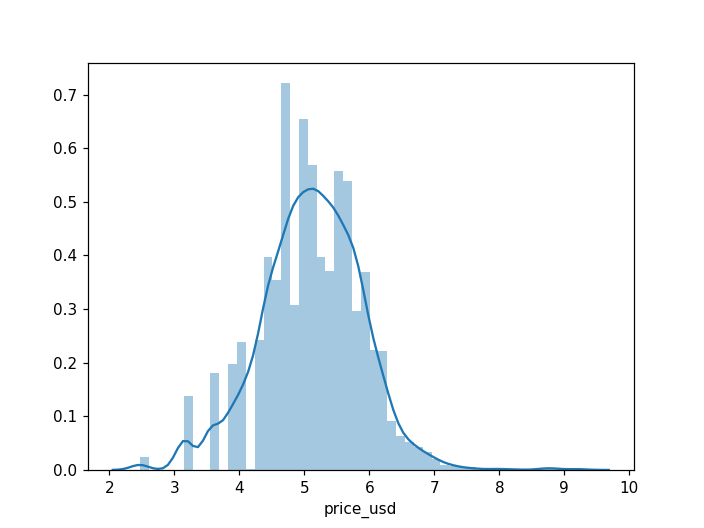

In [5]:
def parse_price(value):
    if value != value: # is nan
        return np.nan, np.nan
    
    try:
        value = value.replace(',', '')

        if value.startswith('About'):
            parts = value.split(' ')[1:3]
            if len(parts) == 2 and parts[1] in ('USD', 'EUR', 'GBP'):
                return float(parts[0]), parts[1]
            return np.nan, np.nan

            opts = dict([opt.split(' ') for opt in value.split(' / ')])    
            for sign, name in zip(['$', '€', '£'], ['USD', 'EUR', 'GBP']):
                if sign in opts:
                    return float(opts[sign]), name
    except:
        pass
    return np.nan, np.nan

RATE = {'EUR': 1.18, 'USD': 1, 'GBP': 1.28}

# fix unicode
df['misc_price'] = df['misc_price'].replace('<e2><80><89>', ' ', regex=True)\
                                   .replace('\u2009', ' ', regex=True)      \
                                   .replace('<c2><a3>', '£', regex=True)    \
                                   .replace('<e2><82><ac>', '€', regex=True)

misc_price = df['misc_price'].apply(parse_price)
misc_price = list(zip(*misc_price.values))

df['price_value'] = misc_price[0]
df['price_money'] = misc_price[1]
df['price_usd'] = df.price_money.map(RATE) * df.price_value

plt.figure()
sns.distplot(np.log(df['price_usd']))

<IPython.core.display.Javascript object>


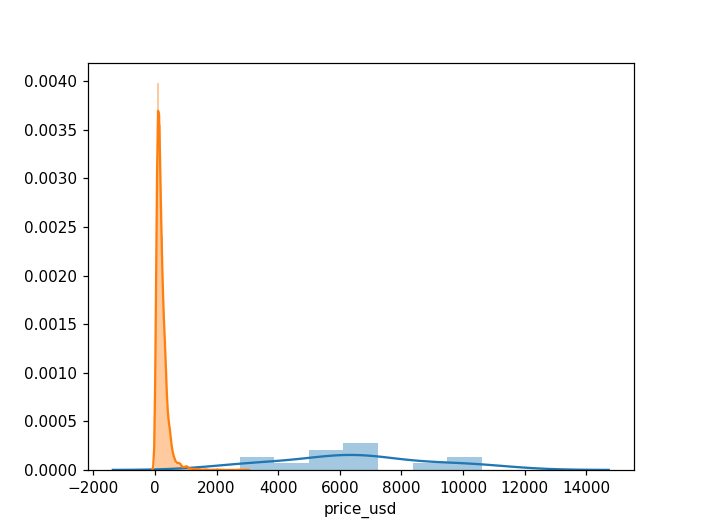

In [6]:
plt.figure()
sns.distplot(df[df.oem == 'Vertu'].price_usd, label='Vertu')
sns.distplot(df[df.oem != 'Vertu'].price_usd, label='Other')

# Vertu is outlier, lets remove it.
df = df[df.oem != 'Vertu'].reset_index(drop=True)

<IPython.core.display.Javascript object>


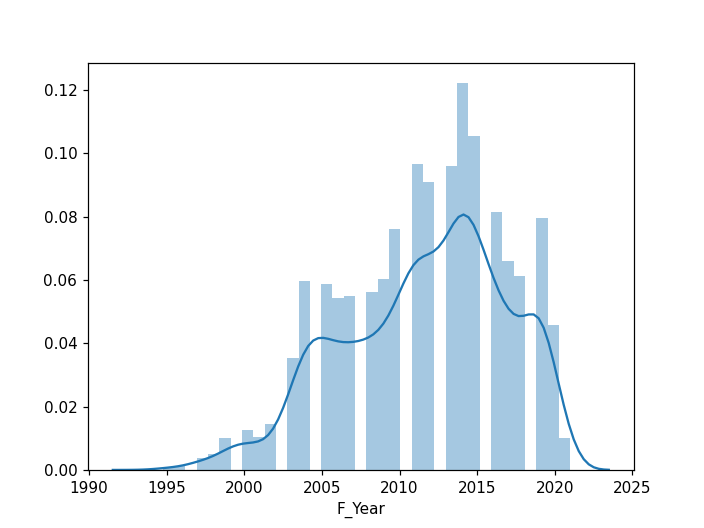

In [7]:
def parse_year(val):
    if re.match('^Not', val):
        return 2021
    
    if val.startswith('Exp. announcement '):
        val = val[len('Exp. announcement '):]
        
    if re.match('^[0-9]{4}', val):
        return int(val[:4])
    return 0

# restore year and drop unknown
df['F_Year'] = df.launch_announced.apply(parse_year) 
df = df[df['F_Year'] > 0].reset_index(drop=True)

plt.figure()
sns.distplot(df.F_Year)

<IPython.core.display.Javascript object>


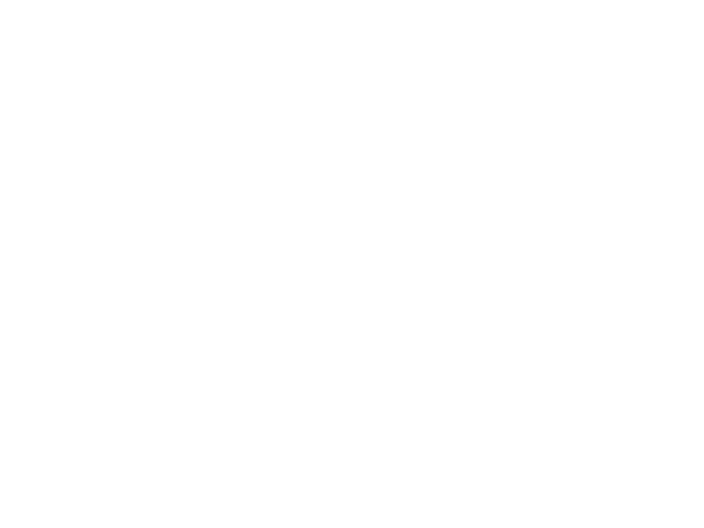

<IPython.core.display.Javascript object>


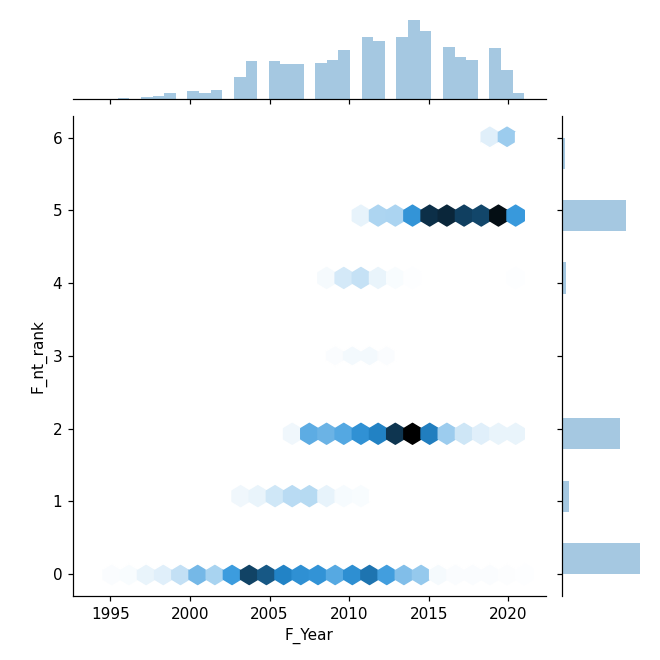

In [8]:
# CDMA == CDMA2000. Fix it
df.network_technology = df.network_technology.transform(lambda x: x.replace('CDMA2000', 'CDMA'))

# extract supported techs
network_technology_list = df.network_technology.apply(lambda x: x.split(' / '))

nt_list = unique(flatten( network_technology_list.values.tolist() ))
nt_features = []
for nt in  nt_list:
    column = 'F_has_' + nt
    nt_features += [column]
    df[column] = network_technology_list.apply(lambda val: nt in val)
    

nt_features_year = []
for nt_f in  nt_features:
    y = df[df[nt_f]].F_Year.min()
    nt_features_year += [(y, nt_f)]
    
nt_ordered_list = [name[len('F_has_'):] for year, name in sorted(nt_features_year)]
nt_rank = {v: k for k, v in enumerate(nt_ordered_list)}
df['F_nt_rank'] =  network_technology_list.apply(lambda val: max([nt_rank[v] for v in val]))

plt.figure()
sns.jointplot(data=df, x='F_Year', y='F_nt_rank', kind='hex')

In [9]:
def parse_resolution(val):
    if val != val:
        return np.nan
    try:
        m = re.search('([0-9]+) x ([0-9]+)', val)
        if m:
            return int(m.group(1)) * int(m.group(2))
    except:
        pass
    return np.nan

def parse_diag(val):
    try:
        m = re.search('^([0-9.]+) x ([0-9.]+) x ([0-9.]+)', val)
        if m:
            return np.sqrt(float(m.group(1)) ** 2 + float(m.group(2)) ** 2)
    except:
        pass
    return np.nan

def parse_camera(val):
    if val != val:
        return np.nan
    
    if val == 'VGA':
        return 640 * 480 / 1024.0
    
    if val == 'CIF':
        return 352 * 288 / 1024.0
    
    try:
        m = re.search('^([0-9.]+) MP', val)
        if m:
            return float(m.group(1))
    except:
        pass
    return np.nan

df['F_diag'] = df.body_dimensions.apply(parse_diag)
df['F_diag'].fillna(df['F_diag'].median(), inplace=True)

df['F_resolution'] = df.display_resolution.apply(parse_resolution)
df['F_resolution'].fillna(df['F_resolution'].median(), inplace=True)


df['F_camera'] = df.main_camera_single.apply(parse_camera)
df['F_camera'].fillna(df['F_camera'].median(), inplace=True)

In [10]:
from sklearn.linear_model import LinearRegression

X = df.loc[df.price_usd.isna() == False][['F_Year', 'F_nt_rank', 'F_resolution', 'F_diag', 'F_camera']]
Y = np.log(df.loc[df.price_usd.isna() == False]['price_usd'])

lr = LinearRegression()
lr.fit(X, Y)
lr.score(X, Y)

0.5572016555768825

In [11]:
dm = df.describe(include=['O']).transpose()
dm[(dm['count'] > 10000) & (dm['unique'] < 250)]

,count,unique,top,freq
oem,10335,115,Samsung,1184
network_technology,10335,40,GSM,3726
network_2g_bands,10315,215,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,2686
body_sim,10335,116,Mini-SIM,4673
display_type,10335,240,"IPS LCD capacitive touchscreen, 16M colors",2647
memory_card_slot,10335,227,No,2499
sound_loudspeaker,10335,20,Yes,8013
sound_3.5mm_jack,10265,7,Yes,6325
comms_wlan,10335,187,No,4036
comms_bluetooth,10326,132,No,1759


In [12]:
df['sound_3.5mm_jack'].fillna(df['sound_3.5mm_jack'].mode(), inplace=True)
df['comms_bluetooth'].fillna('unknown', inplace=True)
df['comms_gps'].fillna('unknown', inplace=True)


In [13]:
years = df.F_Year.unique()
mean_features = ['F_resolution', 'F_diag', 'F_camera']
freq_features = ['features_sensors', 'display_type', 'comms_gps', 'F_nt_rank']

mean_scaled_features = []
for fname in mean_features:
    new_feature = fname + '_scaled'
    mean_scaled_features += [new_feature]
    
    sub_df = df[[fname, 'F_Year']]
    mean_by_year = sub_df.groupby('F_Year').mean().rename(columns={fname: fname + '_mean'})
    df[new_feature] = df[fname] / sub_df.join(mean_by_year, how='left', on='F_Year')[fname + '_mean']
        
freq_scaled_features = []        
for fname in freq_features:
    new_feature = fname + '_scaled'
    freq_scaled_features += [new_feature]

    sub_df = df[[fname, 'F_Year']].copy()    
    total_in_year = sub_df.groupby('F_Year').transform('count').values

    sub_df['dummy'] = 1
    specific_in_year = sub_df.groupby(by=[fname, 'F_Year']).transform('count').values
    df[new_feature] = 1 / (specific_in_year / total_in_year)
    
#freq_scaled_features, mean_scaled_features

In [14]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from  sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

features = make_column_transformer(
    (StandardScaler(), freq_scaled_features),
#    (StandardScaler(), mean_scaled_features),
    (StandardScaler(), mean_features*2)
)

#print(df[['features_sensors', 'oem', 'F_Year', 'F_nt_rank']].isna().any())

mask = df.price_usd.isna() == False
X = features.fit_transform(df[mask])
Y = np.log(df.loc[mask]['price_usd'])

reg = DecisionTreeRegressor()
reg.fit(X, Y)
reg.score(X, Y)

0.9943757341128999

<IPython.core.display.Javascript object>


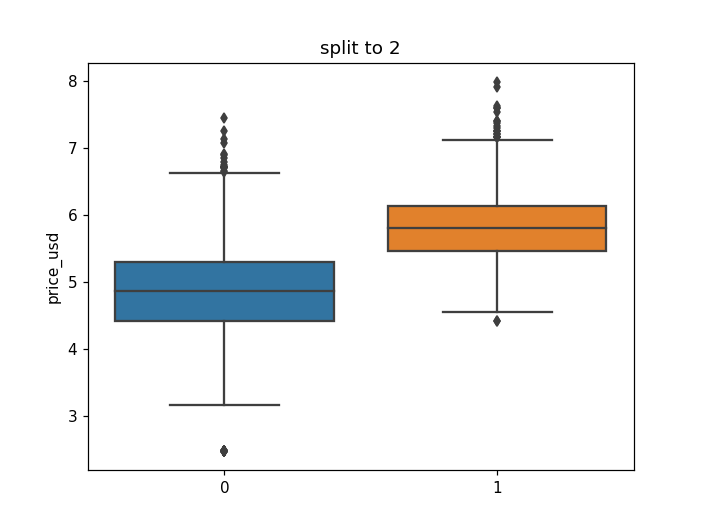

<IPython.core.display.Javascript object>


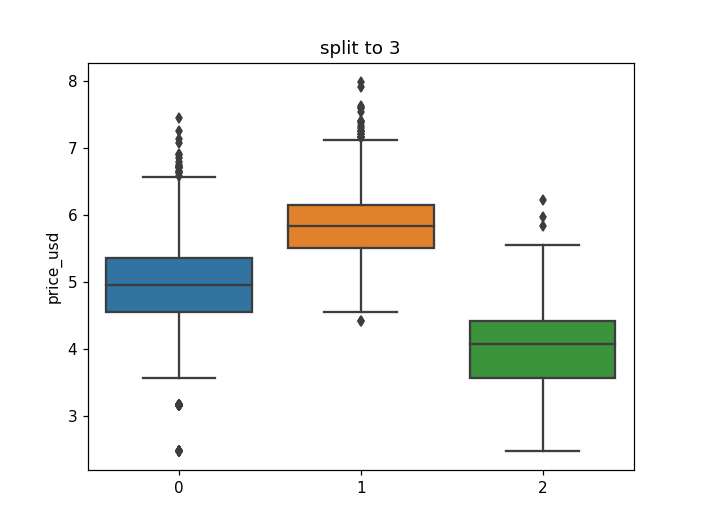

<IPython.core.display.Javascript object>


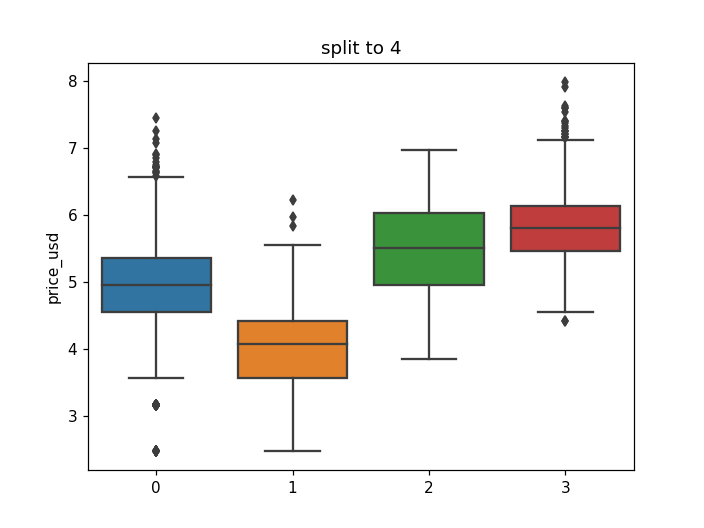

<IPython.core.display.Javascript object>


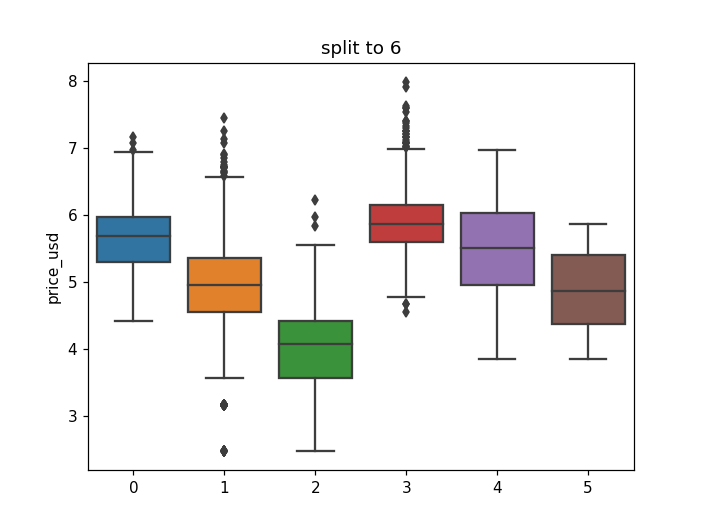

<IPython.core.display.Javascript object>


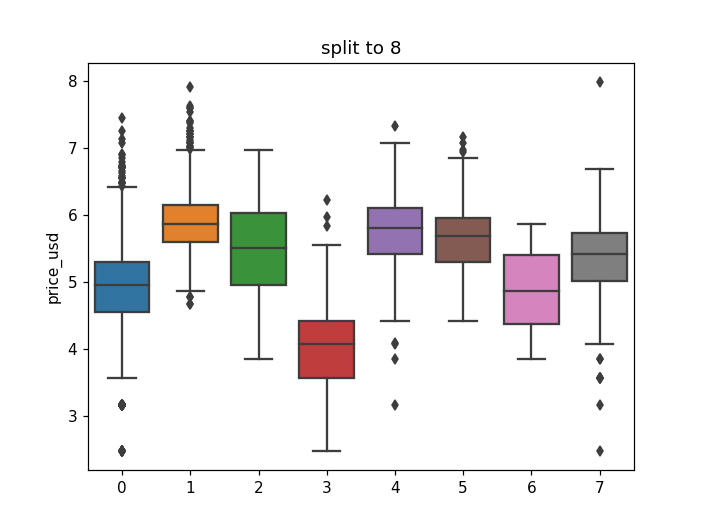

In [15]:
from sklearn.cluster import KMeans


for n_clusters in [2, 3, 4, 6, 8]:
    kmeans = KMeans(n_clusters=n_clusters, max_iter=1000)
    labels = kmeans.fit_predict(X)
    plt.figure()
    plt.title(f'split to {n_clusters}')
    sns.boxplot(x=labels, y=Y);

In [16]:
# 
# The final model: Split into 3 clusters
#



kmeans = KMeans(n_clusters=3, max_iter=1000)
F = features.fit_transform(df)
L = kmeans.fit_predict(F)

df['CLASS'] = L
df.head()

,oem,model,network_technology,network_2g_bands,network_gprs,network_edge,launch_announced,launch_status,body_dimensions,body_weight,...,F_resolution,F_camera,F_resolution_scaled,F_diag_scaled,F_camera_scaled,features_sensors_scaled,display_type_scaled,comms_gps_scaled,F_nt_rank_scaled,CLASS
0,Benefon,Vega,GSM,GSM 900,No,No,1999,Discontinued,145 x 56 x 23 mm (5.71 x 2.20 x 0.91 in),190 g (6.70 oz),...,384000.0,5.0,4.555972,1.173320,1.000000,1.000000,1.288136,1.013333,1.000000,0
1,Garmin-Asus,nuvifone M10,GSM / HSPA,GSM 900 / 1800 / 1900,NaN,NaN,"2010, January. Released 2010, March",Discontinued,-,-,...,384000.0,5.0,2.554605,1.100449,0.185958,7.346154,31.833333,2.850746,2.652778,0
2,Gigabyte,GSmart G1305 Boston,GSM / HSPA,GSM 850 / 900 / 1800 / 1900,NaN,NaN,"2010, April. Released 2010, April",Discontinued,116 x 56.8 x 12.4 mm (4.57 x 2.24 x 0.49 in),118 g (4.16 oz),...,153600.0,5.0,1.021842,1.037467,0.185958,7.346154,19.758621,2.850746,2.652778,0
3,Gigabyte,GSmart,GSM / HSPA,GSM 900 / 1800,NaN,NaN,Not officially announced yet,Cancelled,103 x 54 x 13.4 mm (4.06 x 2.13 x 0.53 in),-,...,76800.0,2.0,0.051267,0.821828,0.216432,10.857143,15.200000,2.533333,2.714286,0
4,Google,Pixel 4 XL,GSM / CDMA / HSPA / EVDO / LTE,GSM 850 / 900 / 1800 / 1900,NaN,NaN,"2019, October 15","Available. Released 2019, October 22",160.4 x 75.1 x 8.2 mm (6.31 x 2.96 x 0.32 in),193 g (6.81 oz),...,4377600.0,5.0,2.296332,1.002477,0.667276,85.571429,85.571429,23.960000,1.147510,2
